# Animal Sequence Emergence Predictions

For each animal sequence:
1. Compute the HA and NA risk using Emergenet (using pretrained Enets from all human strains within 1 year of the present, **1/1/2023 - 1/1/2024**)
2. Predict IRAT emergence scores with `emergenet.emergenet.predict_irat_emergence`
3. Save results: `results/animal_predictions/animal.csv`

    
### Running Processes

Computations are done in:
- `animal_predictions.py`
- `run_animal_predictions.sh`

To run, navigate to terminal and do

`chmod ugo+rwx run_animal_predictions.sh`

`./run_animal_predictions.sh`

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')
from emergenet.emergenet import predict_irat_emergence


RESULT_DIR = 'results/animal_predictions/'

In [2]:
# Get list of all subsets
pattern = 'animal[0-9]*.csv'
file_list = glob.glob(f'{RESULT_DIR}/{pattern}')
animal = pd.DataFrame()
for file in file_list:
    df = pd.read_csv(file)
    animal = pd.concat([animal, df], ignore_index=True)

# Predict emergence risk
animal['geom_mean_risk'] = np.sqrt(animal['ha_risk'] * animal['na_risk'])
animal[['emergence', 'emergence_low', 'emergence_high']] = animal.apply(lambda row: predict_irat_emergence(row['ha_risk'], row['na_risk']), axis=1, result_type='expand')
animal = animal.sort_values(by='emergence', ascending=False).reset_index(drop=True)
animal.to_csv(RESULT_DIR + 'animal.csv', index=False)
animal[['name', 'subtype', 'date', 'emergence']].round(3)

,name,subtype,date,emergence
0,A/swine/Iowa/CEIRS-1495/2023,H1N2,2023-06-15,7.733
1,A/swine/Tver_region/RII-81-1S/2023,H1N1,2023-02-17,7.733
2,A/swine/Missouri/A02524408/2023,H3N2,2023-01-13,7.733
3,A/swine/North_Carolina/A02751333/2022,H3N2,2022-12-13,7.733
4,A/swine/Indiana/A01812310/2020,H1N1,2020-08-17,7.732
...,...,...,...,...
6349,A/chicken/China/2106/2021,H9N2,2021-11-30,3.054
6350,A/chicken/China/2034/2020,H9N2,2020-01-20,3.050
6351,A/chicken/China/2040/2020,H9N2,2020-01-10,3.050
6352,A/green-winged-teal/Georgia/DT-22246/2020,H5N8,2020-09-29,3.046


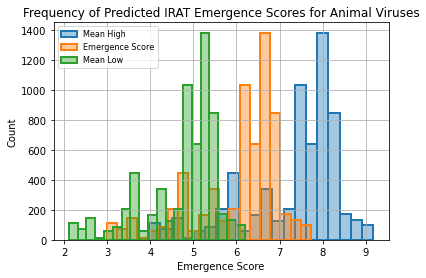

In [3]:
sns.histplot(animal['emergence_high'], label='Mean High', alpha=0.4, color='#1f77b4', linewidth=2, edgecolor='#1f77b4', bins=20)
sns.histplot(animal['emergence'], label='Emergence Score', alpha=0.4, color='#ff7f0e', linewidth=2, edgecolor='#ff7f0e', bins=20)
sns.histplot(animal['emergence_low'], label='Mean Low', alpha=0.4, color='#2ca02c', linewidth=2, edgecolor='#2ca02c', bins=20)

plt.xlabel('Emergence Score')
plt.title('Frequency of Predicted IRAT Emergence Scores for Animal Viruses')
plt.grid()
plt.legend(fontsize=8)
plt.savefig('tables/animal.png',bbox_inches='tight',transparent=True);

## Combine Animal + IRAT

Add a dummy column to the animal predictions, indicating whether the sequence is from IRAT.

In [ ]:
! pwd

In [ ]:
irat = pd.read_csv('results/irat_predictions/irat.csv')
irat_with_accessions = pd.read_csv('data/irat.csv')[['Influenza Virus', 'HA Accession', 'NA Accession']]
irat = irat.merge(irat_with_accessions, on='Influenza Virus', how='left')
animal = pd.read_csv('results/animal_predictions/animal.csv')
irat['is_irat'] = 1
animal['is_irat'] = 0
irat = irat[['Influenza Virus', 'Virus Type', 'Date of Risk Assessment',
             'HA Accession', 'HA Sequence', 'NA Accession', 'NA Sequence', 
             'HA Risk', 'NA Risk', 'Geom Mean Risk', 'Predicted Emergence',
             'Predicted Emergence Low', 'Predicted Emergence High',
             'is_irat', 'Emergence Score', 'Impact Score',
             'Mean Low Acceptable Emergence', 'Mean High Acceptable Emergence',
             'Mean Low Acceptable Impact', 'Mean High Acceptable Impact',]]

irat.columns = list(animal.columns) + ['emergence_score', 'impact_score', 
                                       'mean_low_acceptable_emergence', 'mean_high_acceptable_emergence', 
                                       'mean_low_acceptable_impact', 'mean_high_acceptable_impact']
combined = pd.concat([irat, animal], ignore_index=True)
combined.to_csv(RESULT_DIR + 'animal_combined_with_irat.csv', index=False)

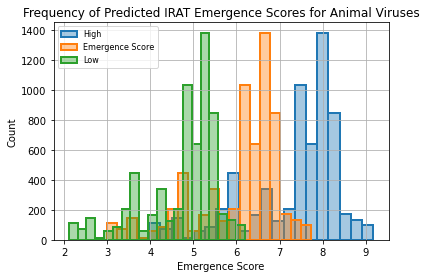

In [4]:
sns.histplot(animal['emergence_high'], label='High', alpha=0.4, color='#1f77b4', linewidth=2, edgecolor='#1f77b4', bins=20)
sns.histplot(animal['emergence'], label='Emergence Score', alpha=0.4, color='#ff7f0e', linewidth=2, edgecolor='#ff7f0e', bins=20)
sns.histplot(animal['emergence_low'], label='Low', alpha=0.4, color='#2ca02c', linewidth=2, edgecolor='#2ca02c', bins=20)

plt.xlabel('Emergence Score')
plt.title('Frequency of Predicted IRAT Emergence Scores for Animal Viruses')
plt.grid()
plt.legend(fontsize=8)
plt.savefig('tables/animal.png',bbox_inches='tight',transparent=True);

In [5]:
animal.columns

Index(['name', 'subtype', 'date', 'ha_accession', 'ha_sequence',
       'na_accession', 'na_sequence', 'ha_risk', 'na_risk', 'geom_mean_risk',
       'emergence', 'emergence_low', 'emergence_high'],
      dtype='object')

In [6]:
collapseddf=pd.read_csv('../../paper_data_v1/irat_qnet/results/animal_predictions/allriskystrains_collapsed.csv')
collapseddf.columns

Index(['id', 'subtype', 'ha_accession', 'na_accession', 'impact_risk',
       'emergence_risk'],
      dtype='object')

Fitted normal distribution parameters: mu = 6.675764984510693, std = 0.16373552733685978
Tail threshold (90th percentile): 7.195991644301605
Tail data: [7.73274639 7.73274639 7.73274639 7.73274639 7.63644379 7.59910398
 7.4234061  7.41519281 7.41246853 7.33864781 7.20542672]
Tail p-value: 0.0006085089958300927
The tail is extreme with a p-value of 0.0006085089958300927, which is less than the significance level of 0.05.


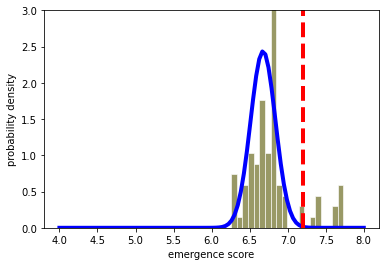

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro, kstest, anderson

# Generate some example data with a long right tail

# Plot the histogram of the data
#plt.hist(data, bins=50, density=True, alpha=0.6, color='g')
#plt.title("Histogram of the Data")
#plt.show()

data = collapseddf.emergence_risk.values#np.concatenate([np.random.normal(0, 1, 1000), np.random.exponential(5, 100)])
#data=(animal['emergence'].values)

# Fit a normal distribution to the entire data
data1=data[data<6.9]
data1=data1[data1>6]
mu, std = norm.fit(data1)
print(f"Fitted normal distribution parameters: mu = {mu}, std = {std}")

# Plot the fitted normal distribution
xmin, xmax = 4,8
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
#plt.hist(data, bins=50, density=True, alpha=0.6, color='g')
plt.plot(x, p, 'b', linewidth=4)
plt.hist(data, bins=20, density=True, alpha=0.6, color='#555500',edgecolor='w')
#plt.title("Histogram of Tail Data with Fitted Log-Normal Distribution")

plt.gca().set_ylim(None,3)
plt.gca().set_ylabel('probability density')
plt.gca().set_xlabel('emergence score')
#plt.title("Histogram with Fitted Normal Distribution")

# Tail analysis using the normal distribution
# Determine the tail cut-off (95th percentile)
tail_threshold = np.percentile(data, 88)
print(f"Tail threshold (90th percentile): {tail_threshold}")

#plt.plot(tail_threshold*np.array([1,1]),[0,3],color='r')
plt.plot(tail_threshold*np.array([1,1]),[0,3],'--r', linewidth=4)

# Extract the tail data
tail_data = data[data > tail_threshold]
print(f"Tail data: {tail_data}")

# Calculate p-value for the tail using the normal distribution
# This p-value is the probability of observing values as extreme as the tail data under the fitted normal distribution
tail_p_value = 1 - norm.cdf(min(tail_data), mu, std)
print(f"Tail p-value: {tail_p_value}")

# Interpretation of the p-value
significance_level = 0.05
if tail_p_value < significance_level:
    print(f"The tail is extreme with a p-value of {tail_p_value}, which is less than the significance level of {significance_level}.")
else:
    print(f"The tail is not considered extreme with a p-value of {tail_p_value}, which is greater than the significance level of {significance_level}.")
#import tikzplotlib
#tikzplotlib.save("../../tex/overleaf3/Figures/straindist0.tex")


Tail threshold (90th percentile): 7.1050425349514965
Tail data: [7.73274639 7.73274639 7.73274639 7.73274639 7.63644379 7.59910398
 7.4234061  7.41519281 7.41246853 7.33864781 7.20542672]
Fitted log-normal distribution parameters: shape = 0.036661137982932204, loc = 0.0, scale = 6.493699457681035
Tail p-value: 0.0022780678420483147
The tail is extreme with a p-value of 0.0022780678420483147, which is less than the significance level of 0.05.


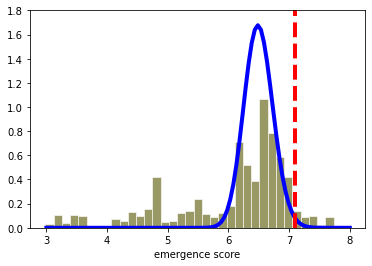

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, shapiro, kstest, anderson

data=animal['emergence'].values#np.exp(-animal['emergence'].values)

# Plot the histogram of the data
#plt.hist(data, bins=50, density=True, alpha=0.6, color='g')
#plt.title("Histogram of the Data")
#plt.show()

# Fit a log-normal distribution to the tail data
# Determine the tail cut-off (88th percentile in this case)
tail_threshold = np.percentile(data, 95)
tail_threshold1 = np.percentile(data, 90)
print(f"Tail threshold (90th percentile): {tail_threshold}")

# Extract the tail data
data2 = data[data < 6.9]
data2 = data2[data2 > 6]
print(f"Tail data: {tail_data}")

# Fit a log-normal distribution to the tail data
shape, loc, scale = lognorm.fit(data2, floc=0)
print(f"Fitted log-normal distribution parameters: shape = {shape}, loc = {loc}, scale = {scale}")

# Plot the fitted log-normal distribution
xmin, xmax = 3,8
x = np.linspace(xmin, xmax, 100)
p = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, p, 'b', linewidth=4)
plt.hist(data, bins=35, density=True, alpha=0.6, color='#555500',edgecolor='w')
#plt.title("Histogram of Tail Data with Fitted Log-Normal Distribution")
plt.plot(tail_threshold*np.array([1,1]),[0,1.8],'--r', linewidth=4)
#plt.plot(tail_threshold1*np.array([1,1]),[0,1.8],'--m', linewidth=4)
plt.gca().set_ylim(None,1.8)
plt.gca().set_xlabel('emergence score')

# Calculate p-value for the tail using the log-normal distribution
# This p-value is the probability of observing values as extreme as the tail data under the fitted log-normal distribution
tail_p_value = 1 - lognorm.cdf(min(tail_data), shape, loc, scale)
print(f"Tail p-value: {tail_p_value}")

# Interpretation of the p-value
significance_level = 0.05
if tail_p_value < significance_level:
    print(f"The tail is extreme with a p-value of {tail_p_value}, which is less than the significance level of {significance_level}.")
else:
    print(f"The tail is not considered extreme with a p-value of {tail_p_value}, which is greater than the significance level of {significance_level}.")
#import tikzplotlib
#tikzplotlib.save("../../tex/overleaf3/Figures/straindist1.tex")


[7.008117777650588, 7.32532570481639]

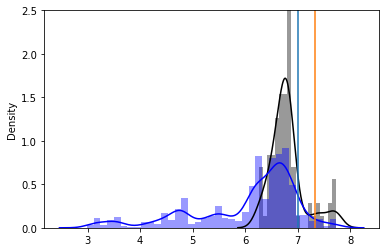

In [9]:
ax=sns.distplot(collapseddf.emergence_risk.values,norm_hist=True,color='#000000')
X=animal['emergence'].values
#X=X[X>6.25]
sns.distplot(X,ax=ax,norm_hist=True,color='b')
ylim=ax.get_ylim()
Q=[np.quantile(collapseddf.emergence_risk.values,q=x) for x in [.87,.9]]
ax.plot([Q[0],Q[0]],ylim)
ax.plot([Q[1],Q[1]],ylim)
ax.set_ylim(ylim[0],2.5)
Q
#import tikzplotlib
#tikzplotlib.save("../../tex/overleaf3/Figures/straindist.tex")
